<a href="https://colab.research.google.com/github/yj336/Yelp-sentiment-anaylsis/blob/master/Yelp_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#1 Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#importing anything that I think will be useful in next steps:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
downloaded = drive.CreateFile({'id':'145m3eD3A_ekkaRJMA_EapsbraQ06_sB6'}) 
downloaded.GetContentFile('user.csv') 

In [0]:
user = pd.read_csv('user.csv')
print( 'done!' )

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


done!


In [0]:
pd.set_option('display.max_columns', None)
userdata = user[['user_id', 'name', 'average_stars', 'friends', 'review_count', 'useful', 'funny', 'cool', 'fans']]

In [0]:
userdata.head()

,user_id,name,average_stars,friends,review_count,useful,funny,cool,fans
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,4.03,"c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",95,84,17,25,5
1,4XChL029mKr5hydo79Ljxg,Jenna,3.63,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",33,48,22,16,4
2,bc8C_eETBWL0olvFSJJd0w,David,3.71,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",16,28,8,10,0
3,dD0gZpBctWGdWo9WlGuhlA,Angela,4.85,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",17,30,4,14,5
4,MM4RJAeH6yuaN8oZDSt0RA,Nancy,4.08,"mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",361,1114,279,665,39


In [0]:
#2. Get the business.csv file
downloaded = drive.CreateFile({'id':'1aehitOH9t2vkDlDxTY3qhZUuX3Mf7_6b'}) 
downloaded.GetContentFile('business.csv') 

In [0]:
business = pd.read_csv('business.csv')
print( 'done!' )

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,25,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


done!


In [0]:
#2. Get the review.csv file
downloaded = drive.CreateFile({'id':'1-j5sV2RRwtBgnTwpWMcLvXuYGClrkv1n'}) 
downloaded.GetContentFile('review.csv') 

In [0]:
fields = ['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool']
review = pd.read_csv('review.csv', usecols=fields)

In [0]:
review.head()

,stars,funny,business_id,review_id,cool,useful,user_id
0,1.0,1,ujmEBvifdJM6h6RLv4wQIg,Q1sbwvVQXV2734tPgoKj4Q,0,6,hG7b0MtEbXx5QzbzE6C_VA
1,5.0,0,NZnhc2sEQy3RmzKTZnqtwQ,GJXCdrto3ASJOqKeVWPi6Q,0,0,yXQM5uF2jS6es16SJzNHfg
2,5.0,0,WTqjgwHlXbSFevF32_DJVw,2TzJjDVDEuAW6MR5Vuc1ug,0,3,n6-Gk65cPZL6Uz8qRm3NYw
3,5.0,0,ikCg8xy5JIg_NGPx-MSIDA,yi0R0Ugj_xUx_Nek0-_Qig,0,0,dacAIZ6fTM6mqwW5uxkskg
4,1.0,0,b1b1eb3uo-w561D0ZfCEiQ,11a8sVPMUFtaC7_ABRkmtw,0,7,ssoyf2_x0EQMed6fgHeMyQ


In [0]:
del downloaded

In [0]:
restaurant = business[['business_id', 'name', 'city', 'stars', 'review_count', 'attributes', 'categories']]
restaurant = restaurant[restaurant['categories'].str.contains('Restaurant') == True] #.rename(columns = {'stars':'overall_stars', 'review_count':'restaurant_review_count'})
restaurant.head()

,business_id,name,city,stars,review_count,attributes,categories
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,Mississauga,2.5,128,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,Charlotte,4.0,170,"{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...","Sushi Bars, Restaurants, Japanese"
11,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,Phoenix,3.0,18,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Restaurants, Breakfast & Brunch, Mexican, Taco..."
13,fweCYi8FmbJXHCqLnwuk8w,Marco's Pizza,Mentor-on-the-Lake,4.0,16,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Italian, Restaurants, Pizza, Chicken Wings"
17,PZ-LZzSlhSe9utkQYU8pFg,Carluccio's Tivoli Gardens,Las Vegas,4.0,40,"{'OutdoorSeating': 'False', 'BusinessAcceptsCr...","Restaurants, Italian"


In [0]:
review_on_restaurant = pd.merge(restaurant.drop(['stars', 'review_count'], axis=1), review.drop(['funny','cool','useful'], axis=1), on='business_id')
review_on_restaurant.head()

,business_id,name,city,attributes,categories,stars,review_id,user_id
0,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,Mississauga,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...",3.0,6W0MQHmasK0IsaoDo4bmkw,2K62MJ4CJ19L8Tp5pRfjfQ
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,Mississauga,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...",3.0,BeeBfUxvzD4qNX4HxrgA5g,A0kENtCCoVT3m7T35zb2Vg
2,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,Mississauga,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...",3.0,A1D2kUnZ0HTroFreAheNSg,SuOLY03LW5ZcnynKhbTydA
3,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,Mississauga,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...",1.0,2pf45Stf-pNew-xgTababQ,lymyUak6KNcNKoDbK87MiQ
4,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,Mississauga,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...",4.0,RHhlmL07evgAdPaXQV8Omg,6vU0I5XgCv9OQHZ76rV6qw


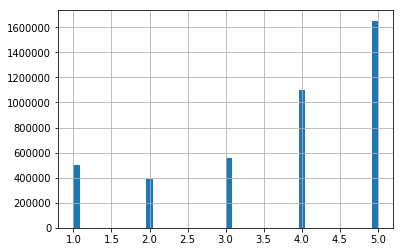

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
review_on_restaurant['stars'].hist(bins=50) 

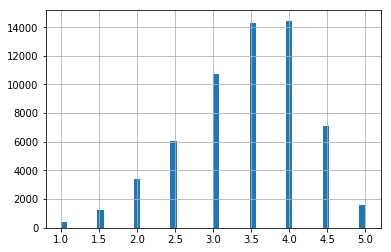

In [0]:
restaurant['stars'].hist(bins=50)

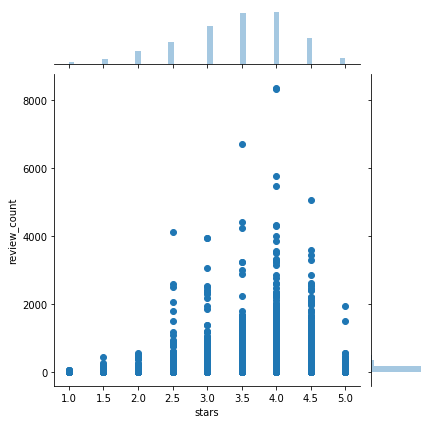

In [0]:
import seaborn as sns
sns.jointplot(x='stars', y='review_count', data=restaurant)

In [0]:
# create the user-restaurant rating matrix
# find a random user
import random

random_user = userdata.sample(n = 1).reset_index()

random_user_review_on_restaurant = review_on_restaurant[review_on_restaurant.user_id == random_user.user_id[0]]
random_user_review_on_restaurant

,business_id,name,city,attributes,categories,stars,review_id,user_id
3693588,knyRhFaM4Bwa8AldEbOiqw,Barro's Pizza,Scottsdale,"{'RestaurantsPriceRange2': '1', 'Alcohol': ""u'...","Sandwiches, Italian, Pizza, Restaurants",2.0,zEMPgrE6O-aC1iorJWFBnA,L_QN0dCUU1g9JlD6gb4rGA


In [0]:
randum_user_business_id = random_user_review_on_restaurant.business_id
#randum_user_business_id
user_to_similar_restaurant = review_on_restaurant[review_on_restaurant.business_id.isin(randum_user_business_id)].user_id.unique()
#user_to_similar_restaurant.shape
reivew_on_similar_restaurant = review_on_restaurant[review_on_restaurant.user_id.isin(user_to_similar_restaurant)]

In [0]:
similar_restaurant = restaurant[ restaurant.business_id.isin(reivew_on_similar_restaurant.business_id) ]
similar_restaurant.sort_values(by='stars', ascending=False).head()

,business_id,name,city,stars,review_count,attributes,categories
74116,Y41j3CfQ35nvEFCV3YPRTQ,Arizona Country Club,Phoenix,5.0,14,"{'RestaurantsDelivery': 'False', 'WiFi': ""u'fr...","Venues & Event Spaces, Restaurants, Golf, Arts..."
40985,ahGtKEHYxY3igWrTHh7FVQ,Top Marks Cafe,Scottsdale,5.0,111,"{'RestaurantsTakeOut': 'True', 'RestaurantsDel...","Cafes, Coffee & Tea, Food, Gelato, Ice Cream &..."
13889,WRlcASYWlNYmMr9lHOYw1Q,Convenient Corner Market,Scottsdale,5.0,57,"{'OutdoorSeating': 'True', 'BusinessParking': ...","Restaurants, Grocery, Convenience Stores, Food..."
84772,VEknvhHwiTTSCR1ALRN0GA,Grocery Station,Scottsdale,5.0,42,"{'BusinessParking': ""{'garage': False, 'street...","Convenience Stores, Delis, Grocery, Restaurant..."
191179,4U44KlOxvGG96pxtYYLR5A,Schmooze Workspace and Cafe,Scottsdale,5.0,70,"{'OutdoorSeating': 'True', 'DogsAllowed': 'Tru...","Venues & Event Spaces, Salad, Sandwiches, Coff..."


In [0]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192609 entries, 0 to 192608
Data columns (total 60 columns):
hours.Thursday                           145903 non-null object
attributes.CoatCheck                     3506 non-null object
hours.Friday                             145174 non-null object
review_count                             192609 non-null int64
attributes.BYOBCorkage                   1423 non-null object
attributes.RestaurantsPriceRange2        108179 non-null object
attributes.BusinessAcceptsCreditCards    113133 non-null object
city                                     192608 non-null object
attributes.Open24Hours                   13 non-null object
state                                    192609 non-null object
attributes.AgesAllowed                   123 non-null object
attributes.NoiseLevel                    43879 non-null object
attributes.WiFi                          50064 non-null object
attributes.ByAppointmentOnly             46853 non-null object
attribut

In [0]:
features = business[business['categories'].str.contains('Restaurant') == True][[
'business_id', 'stars', 'attributes.RestaurantsPriceRange2', 'attributes.BusinessAcceptsCreditCards', 'attributes.WiFi', 'attributes.GoodForKids', 
'attributes.RestaurantsGoodForGroups', 'attributes.BikeParking', 'attributes.RestaurantsTakeOut', 'attributes.RestaurantsDelivery', 'attributes.RestaurantsReservations',
'attributes.OutdoorSeating', 'attributes.HasTV'
]]

# turn the stars into int so that we can use the classifier to predict it
features['stars'] = (features['stars'] * 2).astype(int)
features

,business_id,stars,attributes.RestaurantsPriceRange2,attributes.BusinessAcceptsCreditCards,attributes.WiFi,attributes.GoodForKids,attributes.RestaurantsGoodForGroups,attributes.BikeParking,attributes.RestaurantsTakeOut,attributes.RestaurantsDelivery,attributes.RestaurantsReservations,attributes.OutdoorSeating,attributes.HasTV
1,QXAEGFB4oINsVuTFxEYKFQ,5,2,NaN,u'no',True,True,False,True,False,True,False,False
2,gnKjwL_1w79qoiV3IC_xQQ,8,2,True,u'no',True,True,True,True,False,True,False,True
11,1Dfx3zM-rW4n-31KeC8sJg,6,1,True,u'no',True,True,NaN,True,False,False,False,False
13,fweCYi8FmbJXHCqLnwuk8w,8,2,True,NaN,True,True,True,True,True,False,False,NaN
17,PZ-LZzSlhSe9utkQYU8pFg,8,2,True,u'no',True,True,NaN,True,False,True,False,False
23,1RHY4K3BD22FK7Cfftn8Mg,8,1,True,NaN,True,True,NaN,True,False,False,False,False
25,tstimHoMcYbkSC4eBA1wEg,9,1,True,u'no',True,True,True,True,False,False,False,True
29,NDuUMJfrWk52RA-H-OtrpA,6,2,NaN,u'no',NaN,NaN,True,True,NaN,NaN,NaN,NaN
32,SP_YXIEwkFPPl_9anCYmpQ,7,2,NaN,u'free',False,True,True,False,False,True,False,False
35,BvYU3jvGd0TJ7IyZdfiN2Q,7,2,True,NaN,False,True,NaN,True,False,True,False,NaN


In [0]:
#from sklearn.preprocessing import LabelEncoder
features['attributes.WiFi'] = features['attributes.WiFi'].replace( {"'no'": False, "'free'": True, 'None': False, "'paid'": True, "u\'no'": False, "u\'free'": True, "u\'paid'": True} )
features.dropna()
features_test = features['stars']
features_train = pd.get_dummies(features.drop(['stars','business_id'], axis = 1), drop_first=True)

In [0]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
dt = RandomForestClassifier(n_estimators = 50, oob_score=True)
dt.fit(features_train, features_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [0]:
result = pd.DataFrame()
result['features'] = features_train.columns
result['importance'] = dt.feature_importances_
result = result.sort_values(by='importance', ascending=False).head(13)
result

,features,importance
5,attributes.BusinessAcceptsCreditCards_True,0.100680
22,attributes.HasTV_True,0.089850
6,attributes.WiFi_True,0.083974
8,attributes.GoodForKids_True,0.083286
16,attributes.RestaurantsDelivery_True,0.082583
20,attributes.OutdoorSeating_True,0.079096
12,attributes.BikeParking_True,0.078293
18,attributes.RestaurantsReservations_True,0.074126
14,attributes.RestaurantsTakeOut_True,0.072766
0,attributes.RestaurantsPriceRange2_2,0.072249


In [0]:
dt.score(features_train, features_test)

0.3063128294071093

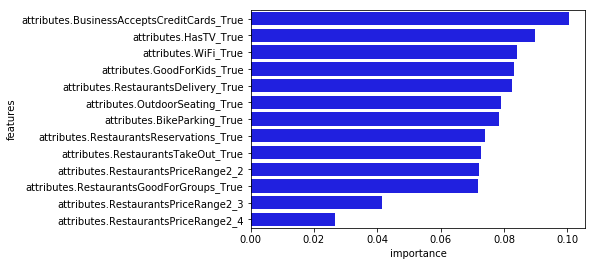

In [0]:
sns.barplot(y='features', x='importance', data=result, color='b')